# Prelude

## Import Packages

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%matplotlib ipympl

In [2]:
import functions.init_logger
import logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.CRITICAL)

In [3]:
import functions.add_path
import functions.et_condition_df as condition_df

import functions.et_helper as et_helper
import functions.plotnine_theme
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.subplot.left'] =  0.2
from plotnine import *
from plotnine.data import *


import be_load

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5

2018-09-05 16:52:40 - OpenGL.acceleratesupport                                          - INFO     - No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
reached exception:pyaudio
2018-09-05 16:52:41 - lib.pupil.pupil_src.shared_modules.calibration_routines.optimization_calibration.build - INFO     - Building extension modules...
reached exception:optimization_calibration
reached exception:glfw.GLFW_PRESS
reached exception:glfw.GLFW_KEY_SPACE
reached exception:glfw.GLFW_KEY_F
reached exception:glfw.glfwSetKeyCallback
reached exception:fingertip_calibration
reached exception:glfw.GLFW_PRESS
reached exception:natural_features_calibration
2018-09-05 16:52:41 - lib.pupil.pupil_src.shared_modules.calibration_routines.optimization_calibration.build - INFO     - Building extension modules...
reached exception:optimization_calibration
2018-09-05 16:52:42 - calibration_routines.optimization_calibration.build               - INFO     - Building extension modules...
reached exc

In [4]:
import os
print(os.getcwd())
if os.getcwd()[-4:] != 'code':
    try:
        os.chdir('./code')
    except:
        os.chdir('/net/store/nbp/users/behinger/projects/etcomp/code')


/net/store/nbp/users/behinger/projects/etcomp/lib/pupil/pupil_src/shared_modules/calibration_routines/optimization_calibration


In [5]:
import BLINK
import SMOOTH
import LARGE_GRID
import LARGE_and_SMALL_GRID
import FREEVIEW
import LUM
import MICROSACC
import CALIBRATION

## Which algorithm?

In [6]:
#algorithm = 'hmmnosmooth_'
algorithm = '' # EM-algorithm
#algorithm = 'hmm_'

## Load Data

In [7]:
(etsamples,etmsgs,etevents) = be_load.load_data(algorithm=algorithm)

loading subject VP1 with et el
loading subject VP1 with et pl
loading subject VP2 with et el
loading subject VP2 with et pl
loading subject VP3 with et el
loading subject VP3 with et pl
loading subject VP4 with et el
loading subject VP4 with et pl
loading subject VP11 with et el
loading subject VP11 with et pl
loading subject VP12 with et el
loading subject VP12 with et pl
loading subject VP14 with et el
loading subject VP14 with et pl
loading subject VP15 with et el
loading subject VP15 with et pl
loading subject VP19 with et el
loading subject VP19 with et pl
loading subject VP20 with et el
loading subject VP20 with et pl
loading subject VP22 with et el
loading subject VP22 with et pl
loading subject VP23 with et el
loading subject VP23 with et pl
loading subject VP24 with et el
loading subject VP24 with et pl
loading subject VP25 with et el
loading subject VP25 with et pl
loading subject VP26 with et el
loading subject VP26 with et pl
loading subject results with et el
File b'/net/s

In [8]:
print(etsamples.subject.unique())
print("There are %i subjects"%(etsamples.subject.unique().shape))

['VP1' 'VP2' 'VP3' 'VP4' 'VP11' 'VP12' 'VP14' 'VP15' 'VP19' 'VP20' 'VP22'
 'VP23' 'VP24' 'VP25' 'VP26']
There are 15 subjects


In [9]:
if algorithm == 'hmm':
    # hmm has a very low threshold to detect smooth pursuit. We therefore use for the grid the nosmooth run of hmm
    (etsamples_grid,etmsgs_grid,etevents_grid) = be_load.load_data(algorithm='hmmnosmooth_')
else:
    # in all other cases, the '..._grid' is an alias
    etsamples_grid = etsamples
    etmsgs_grid = etmsgs
    etevents_grid = etevents

In [10]:
%%capture
raw_large_grid_df = condition_df.get_condition_df(data=(etsamples_grid,etmsgs_grid,etevents_grid),condition='LARGE_GRID')

blink= condition_df.get_condition_df(data=(etsamples,etmsgs,etevents),condition="BLINK")

smooth = condition_df.get_condition_df(data=(etsamples,etmsgs,etevents),condition="SMOOTHPURSUIT")

microsaccades = MICROSACC.detect_microsaccades(etsamples=etsamples,etmsgs=etmsgs,etevents=etevents)

all_lum = LUM.process_lum(etsamples,etmsgs)
all_lum_binned = LUM.bin_lum(all_lum)

# Freeviewing
raw_freeview_df, raw_fix_count_df = condition_df.get_condition_df(data=(etsamples_grid,etmsgs_grid,etevents_grid), condition='FREEVIEW') # loads the detection where all smooth pursuits are defined as fixations

2018-09-05 16:55:05 - functions.et_condition_df                                         - DEBUG    - Data already loaded, just applying transformations
2018-09-05 16:55:06 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP1 
2018-09-05 16:55:07 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP1 
2018-09-05 16:55:08 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP2 
2018-09-05 16:55:09 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP2 
2018-09-05 16:55:09 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP3 
2018-09-05 16:55:10 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP3 
2018-09-05 16:55:11 - functions.et_condition_df   

# Calibration Accuracy

## Load Data

In [11]:
err = pd.DataFrame()

for subject in etsamples.subject.unique():
    err = pd.concat([err,CALIBRATION.pl_accuracy(subject),CALIBRATION.el_accuracy(subject)],ignore_index=True)
err.loc[:,'avg'] = err.avg.astype(float)
err.loc[:,'msg_time'] = err.msg_time.astype(float) 

loading subject VP1
found 7 calibrations
2018-09-05 17:03:33 - camera_models                                                     - INFO     - No user calibration found for camera Pupil Cam1 ID2 at resolution (1280, 720)
2018-09-05 17:03:33 - camera_models                                                     - INFO     - Loading pre-recorded calibration
2018-09-05 17:03:33 - calibration_routines.finish_calibration                           - INFO     - Dismissing 0.48% pupil data due to confidence < 0.60
2018-09-05 17:03:33 - calibration_routines.finish_calibration                           - INFO     - Collected 390 monocular calibration data.
2018-09-05 17:03:33 - calibration_routines.finish_calibration                           - INFO     - Collected 390 binocular calibration data.
2018-09-05 17:03:33 - calibration_routines.calibrate                                    - INFO     - first iteration. root-mean-square residuals: 17.612913834162562, in pixel
2018-09-05 17:03:33 - calibrati

/net/store/nbp/users/behinger/projects/etcomp/lib/pupil/pupil_src/shared_modules/accuracy_visualizer.py:208: RuntimeWarning: invalid value encountered in arccos
  precision = np.sqrt(np.mean(np.arccos(succesive_distances) ** 2))


2018-09-05 17:03:38 - calibration_routines.finish_calibration                           - INFO     - Dismissing 0.40% pupil data due to confidence < 0.60
2018-09-05 17:03:38 - calibration_routines.finish_calibration                           - INFO     - Collected 420 monocular calibration data.
2018-09-05 17:03:38 - calibration_routines.finish_calibration                           - INFO     - Collected 420 binocular calibration data.
2018-09-05 17:03:38 - calibration_routines.calibrate                                    - INFO     - first iteration. root-mean-square residuals: 18.162560720353618, in pixel
2018-09-05 17:03:38 - calibration_routines.calibrate                                    - INFO     - second iteration: ignoring outliers. root-mean-square residuals: 8.54911401591122 in pixel
2018-09-05 17:03:38 - calibration_routines.calibrate                                    - INFO     - used 403 data points out of the full dataset 420: subset is 95.95 percent
2018-09-05 17:03:3

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/code/CALIBRATION.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  out = pd.concat([out,elcaliberror.iloc[minix]],axis=1)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to 

loading subject VP2
found 0 calibrations
2018-09-05 17:04:03 - camera_models                                                     - INFO     - No user calibration found for camera Pupil Cam1 ID2 at resolution (1280, 720)
2018-09-05 17:04:03 - camera_models                                                     - INFO     - Loading pre-recorded calibration
loading subject VP3
found 0 calibrations
2018-09-05 17:04:27 - camera_models                                                     - INFO     - No user calibration found for camera Pupil Cam1 ID2 at resolution (1280, 720)
2018-09-05 17:04:27 - camera_models                                                     - INFO     - Loading pre-recorded calibration
loading subject VP4
found 0 calibrations
2018-09-05 17:04:48 - camera_models                                                     - INFO     - No user calibration found for camera Pupil Cam1 ID2 at resolution (1280, 720)
2018-09-05 17:04:48 - camera_models                                     

In [12]:
err.subject.unique()

array(['VP1', 'VP2', 'VP3', 'VP4', 'VP11', 'VP12', 'VP14', 'VP15', 'VP19',
       'VP20', 'VP22', 'VP23', 'VP24', 'VP25', 'VP26'], dtype=object)

## Results

2018-09-05 17:10:30 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=9.600000000000001 to DejaVu Sans ('/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-09-05 17:10:30 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


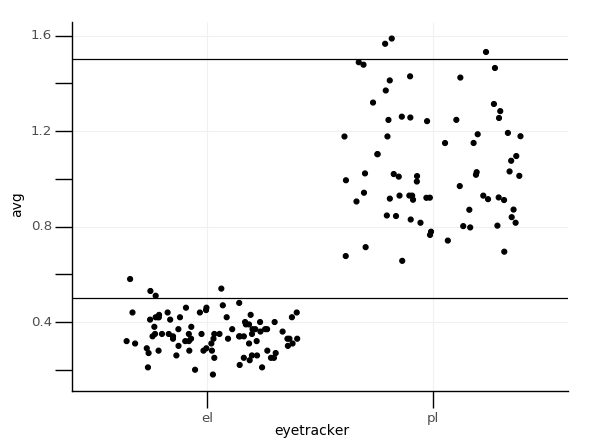

<ggplot: (8785082583458)>

In [13]:
ggplot(err,aes(x="eyetracker",y="avg"))+geom_jitter()+geom_hline(yintercept=[0.5,1.5])#+facet_wrap("~subject")

# Large Grid

## Methods

#### Single Trial view

In [14]:
raw_large_grid_df.iloc[1:2]

,block,element,type,end_time,mean_gx,duration,start_time,rms,mean_gy,condition,exp_event,grid_size,msg_time,posx,posy,hori_accuracy,vert_accuracy,accuracy,et,eyetracker,subject
1,1.0,3.0,fixation,66.335,36.941557,0.874,65.461,0.050926,14.989577,GRID,element,49.0,64.884,36.412071,15.455667,0.529486,0.46609,0.59821,EyeLink,el,VP1


In [15]:
%matplotlib ipympl
from functions import et_helper
et_helper.plot_around_event(etsamples_grid,etmsgs_grid,etevents_grid,raw_large_grid_df.query("eyetracker=='pl'&subject=='VP4'&block==1").iloc[5],plusminus=(-2,5))
%matplotlib inline

2018-09-05 17:10:30 - matplotlib.backends                                               - DEBUG    - backend module://ipympl.backend_nbagg version unknown


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2018-09-05 17:10:31 - matplotlib.backends                                               - DEBUG    - backend module://ipykernel.pylab.backend_inline version unknown


In [16]:
%matplotlib ipympl
et_helper.plot_around_event(etsamples_grid,etmsgs_grid,etevents_grid,raw_large_grid_df.query("eyetracker=='el'&subject=='VP4'&block==1").iloc[9],plusminus=(-2,5))
%matplotlib inline

2018-09-05 17:10:31 - matplotlib.backends                                               - DEBUG    - backend module://ipympl.backend_nbagg version unknown


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2018-09-05 17:10:31 - matplotlib.backends                                               - DEBUG    - backend module://ipykernel.pylab.backend_inline version unknown


## Results

#### Accuracy Table

In [17]:
LARGE_GRID.make_table_accuracy(raw_large_grid_df)

,mean,median,horizontal_mean,vertical_mean,subject_min_accuracy,subject_max_accuracy,mean_rms
EyeLink,1.15595,0.966056,0.872415,0.92759,0.602418,3.22539,0.0482282
Pupil Labs,1.69143,1.34125,1.14853,1.41251,0.958829,4.27488,0.237145


In [18]:
raw_large_grid_df.query("subject=='VP4'&eyetracker=='pl'").duration-raw_large_grid_df.query("subject=='VP4'&eyetracker=='el'").duration

0      0.13080
1      0.00240
2      0.00520
3      0.13720
4      0.03480
5      0.00840
6     -0.00140
7      0.12100
8      0.00960
9      0.17680
10     0.00160
11     0.00780
12     0.00200
13     0.00820
14     0.12200
15     0.01680
16     0.00020
17     0.00100
18     0.00120
19    -0.00460
20     0.14260
21    -0.00260
22     0.15280
23    -0.01560
24    -0.00200
25     0.00900
26     0.14689
27     0.13300
28     0.00940
29    -0.00160
        ...   
264    0.01380
265    0.11540
266    0.02500
267    0.00760
268    0.01100
269    0.00280
270    0.01040
271   -0.00320
272   -0.00840
273    0.01700
274    0.00380
275   -0.00100
276    0.00520
277   -0.21640
278   -0.17260
279    0.00880
280    0.15180
281    0.01840
282    0.00900
283    0.01400
284    0.00340
285    0.13540
286   -0.00080
287    0.11780
288    0.11740
289    0.00400
290    0.00640
291   -0.00200
292   -0.00040
293    0.11140
Name: duration, Length: 294, dtype: float64

2018-09-05 17:10:43 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=bold:stretch=normal:size=9.600000000000001 to DejaVu Sans ('/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf') with score of 0.000000


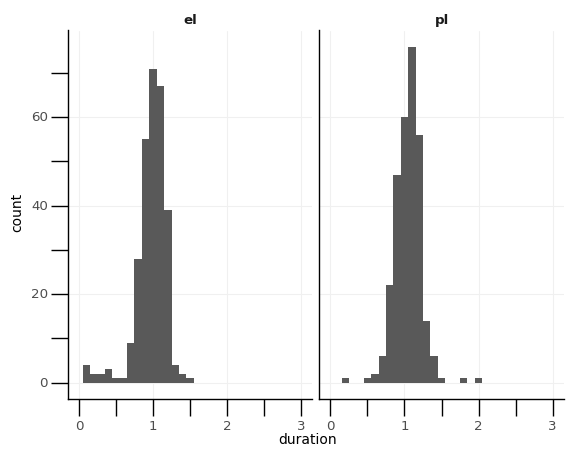

<ggplot: (-9223363251636551473)>

In [19]:
ggplot(raw_large_grid_df.query("subject=='VP4'"),aes(x="duration"))+geom_histogram(binwidth=0.1)+coord_cartesian(xlim=(0,3))+facet_grid("~eyetracker")

In [20]:
raw_large_grid_df.groupby(["subject","eyetracker"],as_index=False).duration.agg("median").groupby("eyetracker").agg("mean")

,duration
eyetracker,
el,1.029200
pl,1.079885


#### Accuracy Plots

1. Take mean accuracy over grid-elements
2. Take **median** block accuracy for each subject

2018-09-05 17:10:45 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=14.399999999999999 to DejaVu Sans ('/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


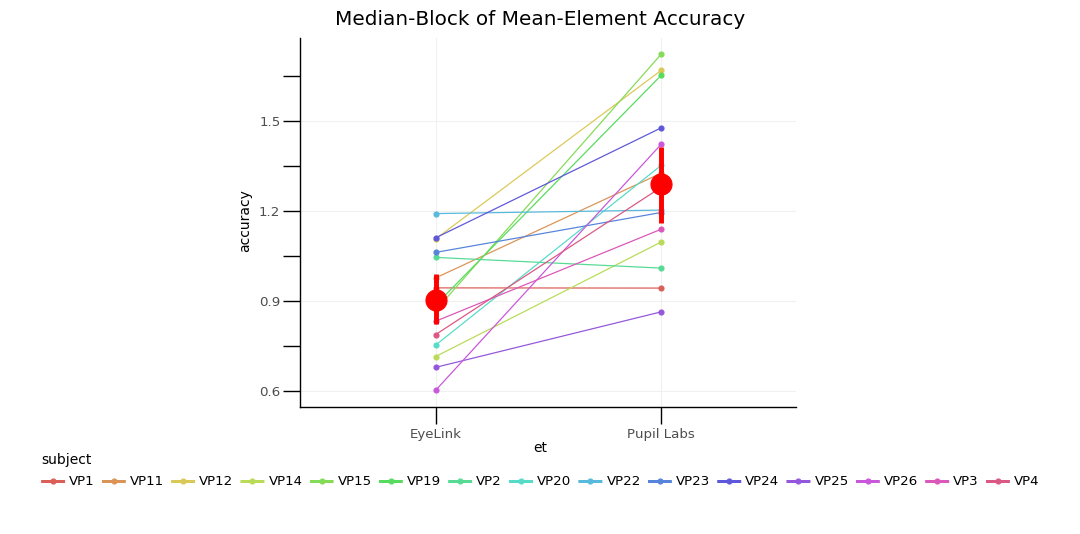

<ggplot: (8785646784432)>

In [21]:
LARGE_GRID.plot_accuracy_be(raw_large_grid_df)+ggtitle("Median-Block of Mean-Element Accuracy")

1. Take mean accuracy over grid-elements
2. Take **mean** block accuracy for each subject

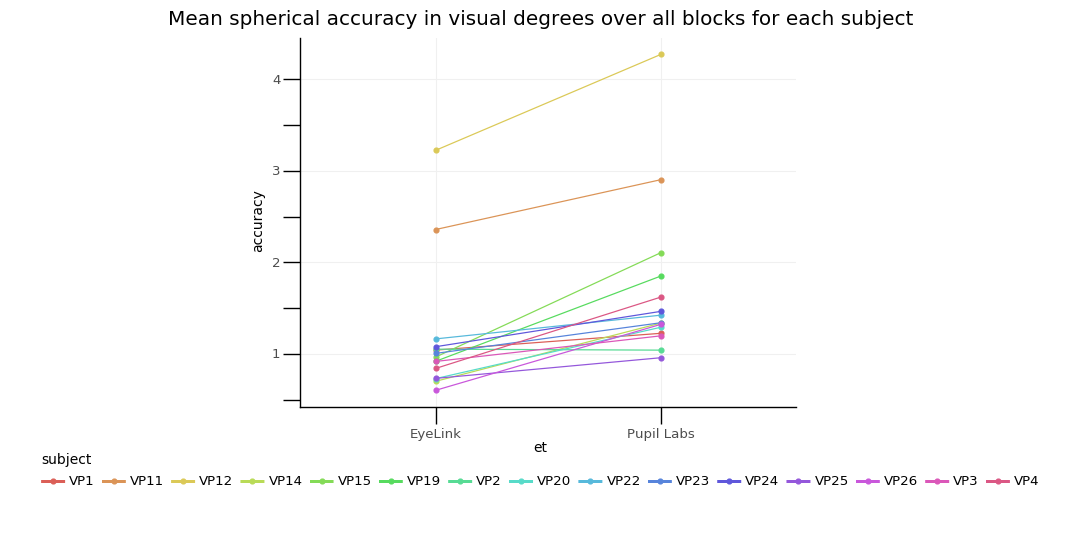

In [22]:
LARGE_GRID.plot_accuracy(raw_large_grid_df)

#### Single Subject Grid

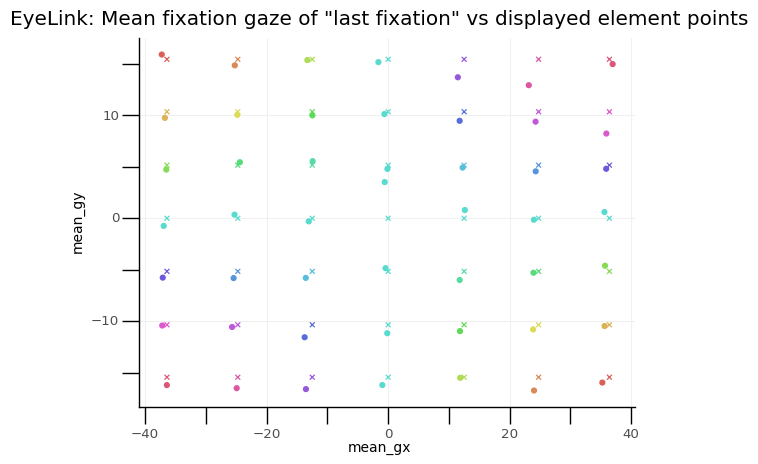

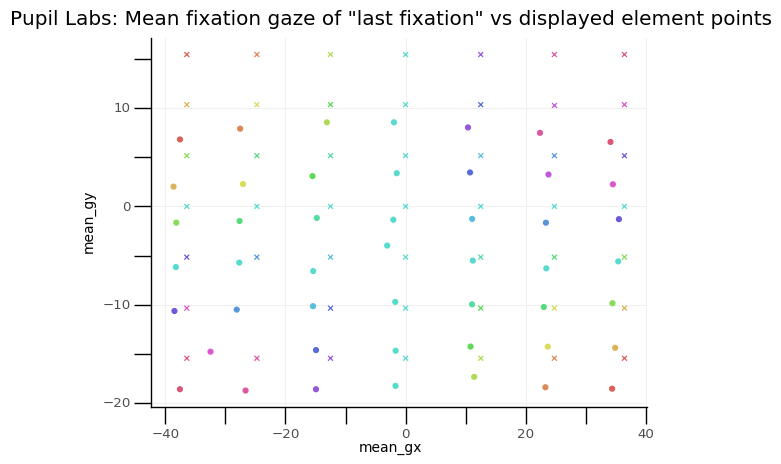

In [23]:
LARGE_GRID.display_fixations(raw_large_grid_df, option='offset',input_subject="VP1",input_block=1)

#### Grid element centered plot

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 121 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


2018-09-05 17:10:47 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=9.0 to DejaVu Sans ('/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


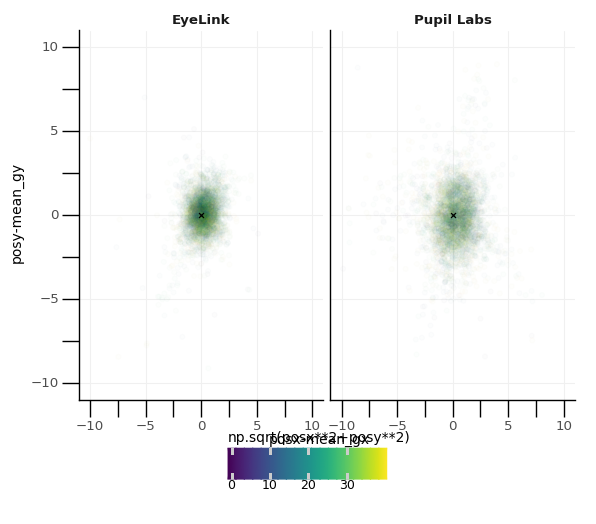

<ggplot: (-9223363251280974767)>

In [24]:
LARGE_GRID.display_fixation_centered(raw_large_grid_df)+xlim((-10,10))+ylim((-10,10))

#### Position vs Accuracy

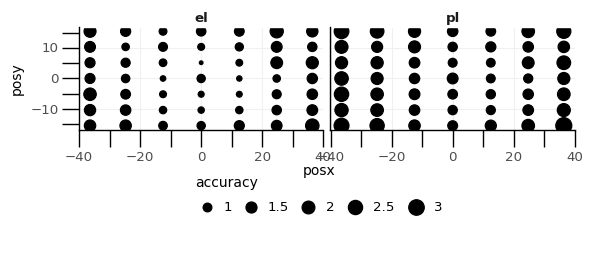

<ggplot: (8785014477341)>

In [25]:
(ggplot(raw_large_grid_df.groupby(['eyetracker','posx','posy'],as_index=False).mean(),aes(x="posx",y="posy",size="accuracy"))+geom_point()+facet_wrap("~eyetracker"))+coord_fixed()

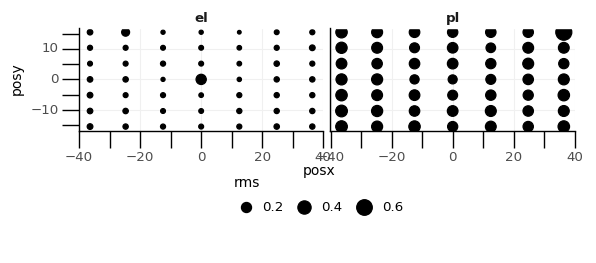

<ggplot: (8785172185692)>

In [26]:
(ggplot(raw_large_grid_df.groupby(['eyetracker','posx','posy'],as_index=False).mean(),aes(x="posx",y="posy",size="rms"))+geom_point()+facet_wrap("~eyetracker"))+coord_fixed()

#### Engbert vs. HMM
This can be thought of a precursor to compare different pupillabs detection algorithms e.g. (3D vs 2D)

In [27]:
if algorithm == '':
    etsamples_engbert = etsamples
    etmsgs_engbert = etmsgs
    etevents_engbert = etevents
    raw_large_grid_df_engbert = raw_large_grid_df
    
    (etsamples_hmm,etmsgs_hmm,etevents_hmm) = be_load.load_data(algorithm='hmmnosmooth_')
    raw_large_grid_df_hmm = condition_df.get_condition_df(data=(etsamples_hmm,etmsgs_hmm,etevents_hmm),condition='LARGE_GRID')
else:
    etsamples_hmm = etsamples
    etmsgs_hmm = etmsgs
    etevents_hmm = etevents
    raw_large_grid_df_hmm = raw_large_grid_df
    
    (etsamples_engbert,etmsgs_engbert,etevents_engbert) = be_load.load_data(algorithm='')
    raw_large_grid_df_engbert = condition_df.get_condition_df(data=(etsamples_engbert,etmsgs_engbert,etevents_engbert),condition='LARGE_GRID')

loading subject VP1 with et el
loading subject VP1 with et pl
loading subject VP2 with et el
loading subject VP2 with et pl
loading subject VP3 with et el
loading subject VP3 with et pl
loading subject VP4 with et el
loading subject VP4 with et pl
loading subject VP11 with et el
loading subject VP11 with et pl
loading subject VP12 with et el
loading subject VP12 with et pl
loading subject VP14 with et el
loading subject VP14 with et pl
loading subject VP15 with et el
loading subject VP15 with et pl
loading subject VP19 with et el
loading subject VP19 with et pl
loading subject VP20 with et el
loading subject VP20 with et pl
loading subject VP22 with et el
loading subject VP22 with et pl
loading subject VP23 with et el
loading subject VP23 with et pl
loading subject VP24 with et el
loading subject VP24 with et pl
loading subject VP25 with et el
loading subject VP25 with et pl
loading subject VP26 with et el
loading subject VP26 with et pl
loading subject results with et el
File b'/net/s

In [28]:
GRID_accuracy_table = pd.concat(
    [LARGE_GRID.make_table_accuracy(raw_large_grid_df_hmm).assign(    algorithm='hmm_nosmooth'),
     LARGE_GRID.make_table_accuracy(raw_large_grid_df_engbert).assign(algorithm='engbert'     )])
GRID_accuracy_table

,mean,median,horizontal_mean,vertical_mean,subject_min_accuracy,subject_max_accuracy,mean_rms,algorithm
EyeLink,1.25722,1.00374,0.90134,0.928133,0.621138,3.32787,0.105255,hmm_nosmooth
Pupil Labs,1.64435,1.32028,1.14248,1.29937,0.914179,4.10203,0.0907873,hmm_nosmooth
EyeLink,1.15595,0.966056,0.872415,0.92759,0.602418,3.22539,0.0482282,engbert
Pupil Labs,1.69143,1.34125,1.14853,1.41251,0.958829,4.27488,0.237145,engbert


## Statistical Model Tests (Beta)

In [29]:
%load_ext rpy2.ipython
%Rpush raw_large_grid_df

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:57: UserWarning: Error while trying to convert the column "block". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  (name, str(e)))


In [30]:
%%R
library(lme4)
raw_large_grid_df$et = factor(raw_large_grid_df$et)
contrasts(raw_large_grid_df$et)=c(-0.5,0.5)
mres <- lmer(accuracy ~ 1+et +  ( 1 + et | subject/block ) ,data = raw_large_grid_df)
summary(mres)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)


Linear mixed model fit by REML ['lmerMod']
Formula: accuracy ~ 1 + et + (1 + et | subject/block)
   Data: raw_large_grid_df

REML criterion at convergence: 41965.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.1569 -0.2201 -0.0710  0.1135 16.5726 

Random effects:
 Groups        Name        Variance Std.Dev. Corr
 block:subject (Intercept) 3.02475  1.7392       
               et1         0.16753  0.4093   0.90
 subject       (Intercept) 0.06848  0.2617       
               et1         0.03625  0.1904   0.29
 Residual                  6.73847  2.5959       
Number of obs: 8766, groups:  block:subject, 90; subject, 15

Fixed effects:
            Estimate Std. Error t value
(Intercept)  1.42605    0.19734   7.226
et1          0.54273    0.08578   6.327

Correlation of Fixed Effects:
    (Intr)
et1 0.478 


In [31]:
%%R
#this cell takes very long to run!

#library(robustlmm)
#rmres <- rlmer(accuracy ~ 1+et +  ( 1 + et | subject/block ) ,data = raw_large_grid_df,verbose=0)
#summary(rmres)

NULL


## Supplementary

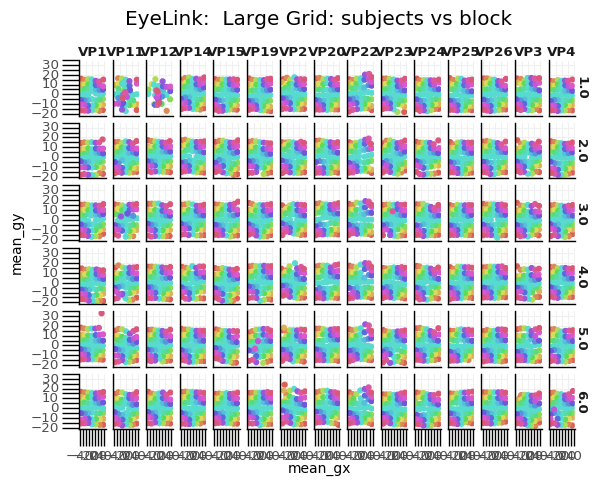

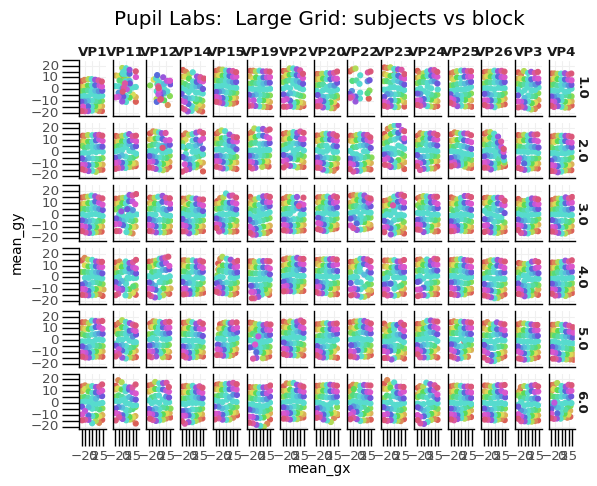

In [32]:
# investigate on the position and properties of detected fixations
LARGE_GRID.display_fixations(raw_large_grid_df, option='fixations')

# Blinks

In [33]:
blink.query("duration==0").shape

(0, 36)

In [34]:
blink = blink.query("duration>0") # this removes the eyelin wrong blinks, they are in there since importing the data

## Results

#### Number of Blinks

In [35]:
BLINK.plot_count(blink)

ValueError: zero-size array to reduction operation minimum which has no identity

#### Duration of Blinks

In [ ]:
BLINK.plot_duration(blink)

#### Subject-wise number + duration

In [ ]:
BLINK.plot_count(blink,option="facet_subjects")

In [ ]:
BLINK.plot_duration(blink,option="facet_subjects")

# Smooth Pursuit

## Load Smooth Data

In [ ]:
# this loads the bayesian model results
cfg = {'redo':False} # should be specified in the beginning of the notebook
if cfg['redo']:
    smoothresult = SMOOTH.fit_bayesian_model(etsamples,etmsgs,etevents)
    SMOOTH.save_smooth(smoothresult)
else:
    smoothresult = SMOOTH.load_smooth()

## Methods

The model: Changepoint $\tau$ with  $pos  = \beta_{const}$ if $t<\tau$ and $pos = \beta_{const} + time * \beta_{velocity}$ if $t>=\tau$

#### Single Trial Modelfit

In [ ]:
smooth_stanmodel = SMOOTH.compileModel() # to facilitate plotting 

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]

In [ ]:
%matplotlib ipympl
plt.figure()
fitA = SMOOTH.plot_single_trial(etsamples,etmsgs,None,'VP3','el',10,4,smooth_stanmodel) # trial 1, block 1
fitB = SMOOTH.plot_single_trial(etsamples,etmsgs,None,'VP3','pl',10,4,smooth_stanmodel) # trial 1, block 1
%matplotlib inline

Main Results follow. First latency, then estimated velocity

## Results

#### Initial Latency

In [ ]:
import SMOOTH
%autoreload 2
SMOOTH.plot_modelresults(smoothresult,field="taumean",option="")

In [ ]:
SMOOTH.plot_modelresults(smoothresult,field="taumean",option="difference")

#### Velocity

In [ ]:
SMOOTH.plot_modelresults(smoothresult,field="velomean",option="")

In [ ]:
SMOOTH.plot_modelresults(smoothresult,field="velomean",option="difference")

#### Catchup Saccade Amplitudes

In [ ]:
SMOOTH.plot_catchup_amplitudes(smooth)+expand_limits(y = 0)

# Microsaccades

## Results

In [ ]:
# 6 blocks x 20s
MICROSACC.plot_default(microsaccades,subtype="count/(6*20)")+ylab("microsaccaderate [1/s]")

It is highly unlikely to have ~7 microsaccades per second. Pupillabs eyetracker does not seem able to find microsaccades without tweaking the algorithm.

In [ ]:
MICROSACC.plot_default(microsaccades,subtype="amplitude mean")

In [ ]:
MICROSACC.plot_densities(microsaccades)

In [ ]:
MICROSACC.plot_mainsequence(microsaccades)+coord_cartesian(xlim=(-3,1))

# Pupil Dilation

## Results

In [ ]:
LUM.plot_time_all(all_lum_binned)

In [ ]:
LUM.plot_time_diff(all_lum_binned,subject="VP3")

In [ ]:
LUM.plot_mean(all_lum)

In [ ]:
LUM.plot_diff(all_lum)

In [ ]:
#(ggplot(all_lum_binned.query("lum>0&subject=='VP3'"),aes(x="td",y="gx"))+geom_smooth(method='loess'))+facet_wrap("~eyetracker")+xlim(-1,4)

### TODO: Fix this and make it available for all subjects.

In [ ]:
from functions.detect_saccades import interpolate_gaze
def wrapper_interpolate(x,fs=120):
    print("working on et:%s, subject:%s"%(x.iloc[0]['eyetracker'],x.iloc[0]['subject']))
    tmp = interpolate_gaze(x,fs=fs)
    tmp.loc[:,"eyetracker"] = x.iloc[0]['eyetracker']
    tmp.loc[:,"subject"] = x.iloc[0]['subject']
    return(tmp)
etsamples_100hz = etsamples.query("subject=='VP3'").groupby(["eyetracker","subject"],as_index=False).apply(lambda x:wrapper_interpolate(x,fs=100))

In [ ]:
"pa" in etsamples_100hz.columns

In [ ]:
etsamples_100hz = etsamples_100hz.query("smpl_time>%.2f"%(max(etsamples_100hz.groupby(["eyetracker"]).smpl_time.agg(min))))

In [ ]:
# currently not working
#etsamples_100hz.loc[etsamples_100hz.eyetracker=='el','pa_diff']=etsamples_100hz.query("eyetracker=='el'").pa.values-etsamples_100hz.query("eyetracker=='pl'").pa.values

In [ ]:
#currently not working
#ggplot(etsamples_100hz.loc[1:35000].query("eyetracker=='el'"),aes(x="pa",y="pa_diff"))+geom_point()

# Freeviewing

## Results

In [ ]:
# plot the fixations as a heatmap
# TODO annotation how many fixations from how many pictures are used for each eyetracker
FREEVIEW.plot_heatmap(raw_freeview_df,raw_fix_count_df)

In [ ]:
# plot fixation counts
FREEVIEW.plot_number_of_fixations(raw_fix_count_df, option=None)

In [ ]:
FREEVIEW.plot_number_of_fixations(raw_fix_count_df, option='eyetracker')

In [ ]:
FREEVIEW.plot_number_of_fixations(raw_fix_count_df, option='facet_subjects')

In [ ]:
# plot histogram of the counts
FREEVIEW.plot_histogram(raw_fix_count_df)

In [ ]:
# plot fixation durations
FREEVIEW.plot_fixation_durations(raw_freeview_df)

In [ ]:
FREEVIEW.plot_fixation_durations(raw_freeview_df, option='facet_subjects')

In [ ]:
# TODO plot main sequence
#FREEVIEW.plot_main_sequence(raw_freeview_df)